In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Avocado.csv')

In [3]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
data = data.sort_values('Date')

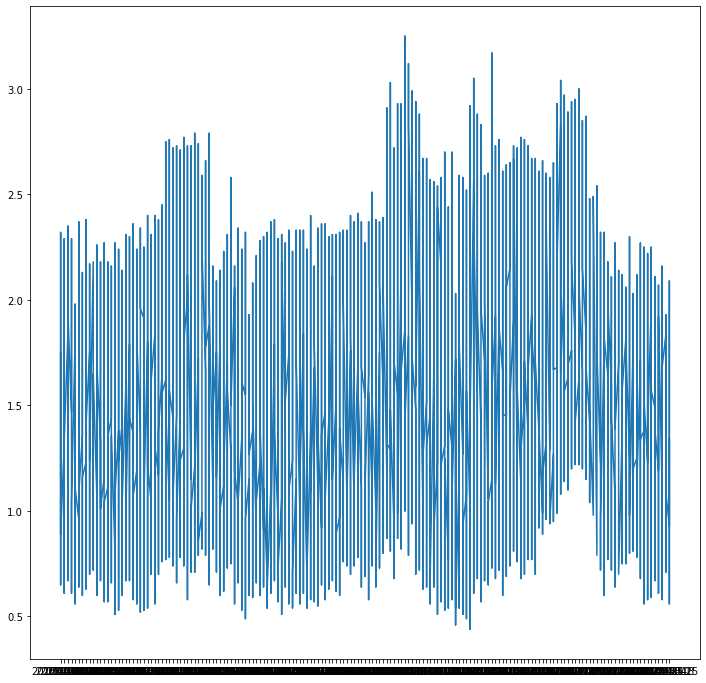

In [5]:
plt.figure(figsize = (12,12))
plt.plot(data['Date'],data['AveragePrice'])

<AxesSubplot:xlabel='region', ylabel='count'>

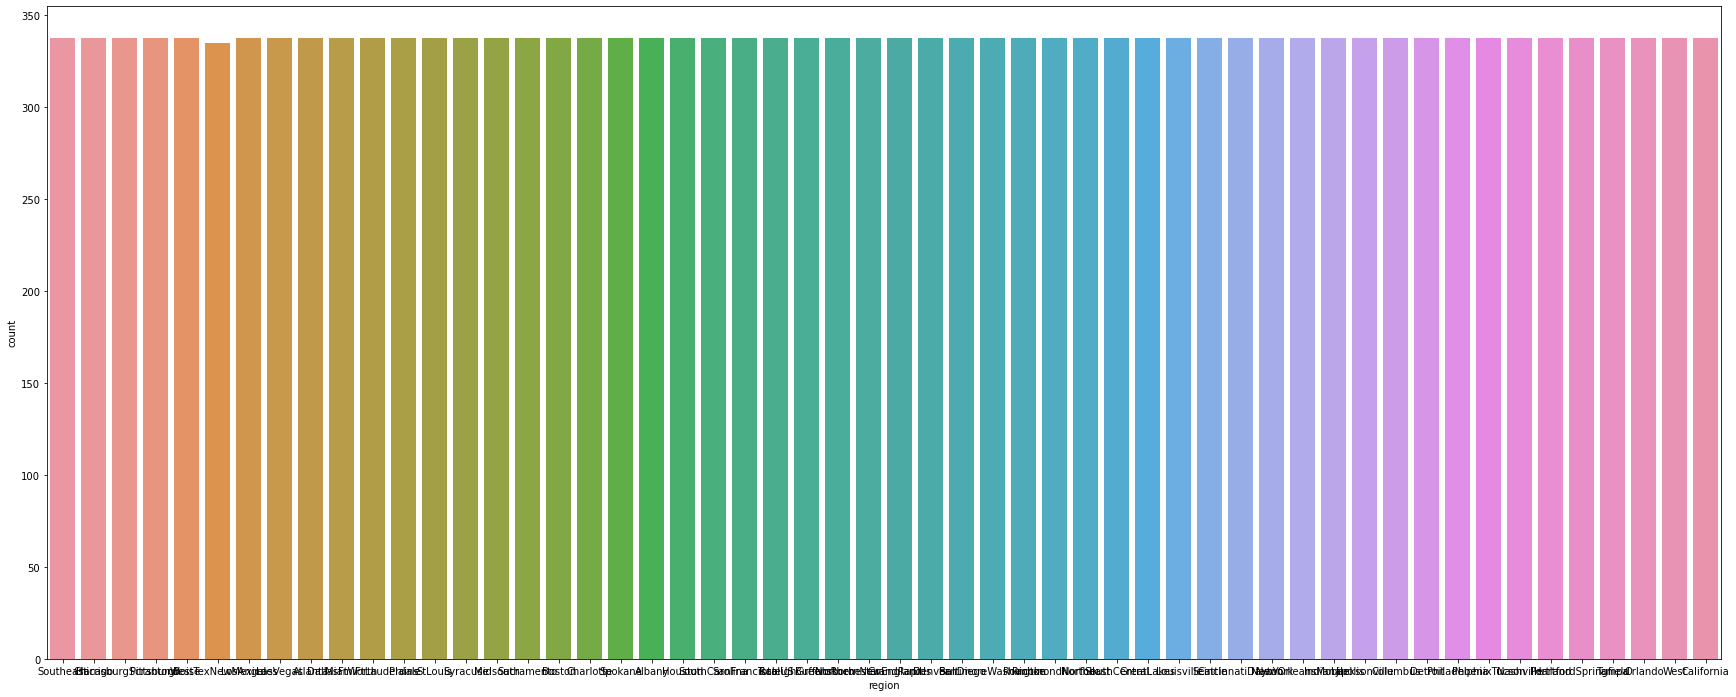

In [6]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'region', data = data)

<AxesSubplot:xlabel='year', ylabel='count'>

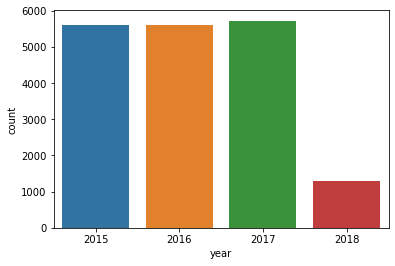

In [7]:
sns.countplot(x = 'year',data = data)

In [8]:
avocado = data.drop(['Unnamed: 0'],axis = 1)

In [9]:
avocado_df = avocado.drop(['Total Volume', '4046','4225','4770','Total Bags', 'Small Bags', 'Large Bags','XLarge Bags', 'type', 'year','region'],axis = 1)

In [14]:
avocado_data = avocado_df.rename(columns = {"Date":"ds", "AveragePrice":"y"})

In [15]:
from prophet import Prophet

In [16]:
model = Prophet()
model.fit(avocado_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Dell\.conda\envs\avo\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [18]:
future_data = model.make_future_dataframe(periods = 365)
forecast = model.predict(future_data)

C:\Users\Dell\.conda\envs\avo\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Dell\.conda\envs\avo\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


C:\Users\Dell\.conda\envs\avo\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


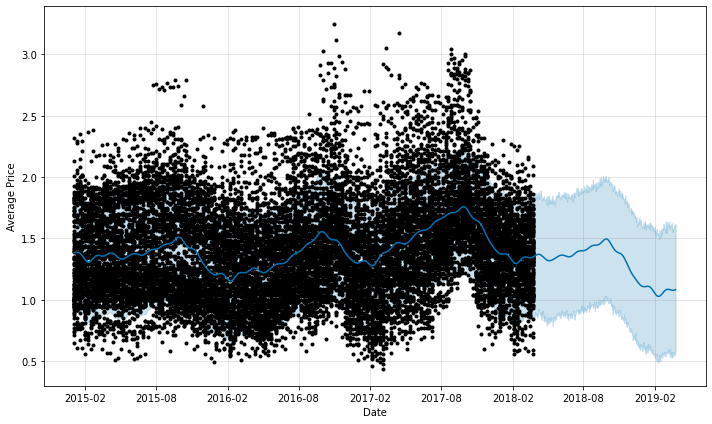

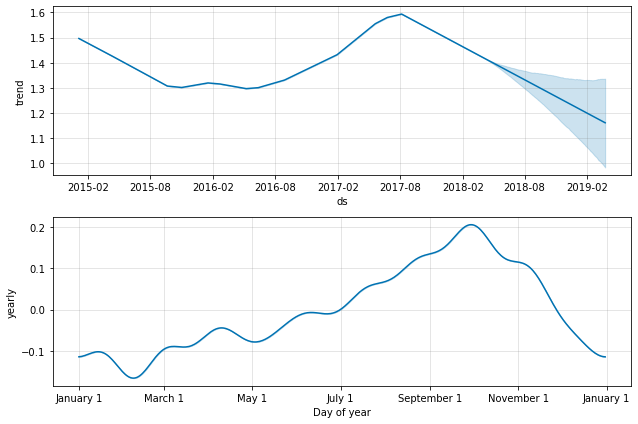

In [19]:
figure = model.plot(forecast,xlabel = 'Date',ylabel= 'Average Price')
figure = model.plot_components(forecast)